In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
#! pip install arch
from arch import arch_model
#!pip install prophet
from prophet import Prophet
#!pip install yfinance

C:\Users\arakh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import yfinance as yf

data = yf.Ticker('BZ=F')

In [3]:
oil = data.history(start = '2016-01-04', end = '2022-10-07')
oil.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,37.400002,38.990002,36.779999,37.220001,41288,0,0
2016-01-05 00:00:00-05:00,37.320000,37.570000,36.250000,36.419998,29327,0,0
2016-01-06 00:00:00-05:00,36.720001,36.720001,34.139999,34.230000,43019,0,0
2016-01-07 00:00:00-05:00,34.520000,34.730000,32.180000,33.750000,44381,0,0
2016-01-08 00:00:00-05:00,33.799999,34.730000,32.790001,33.549999,39985,0,0


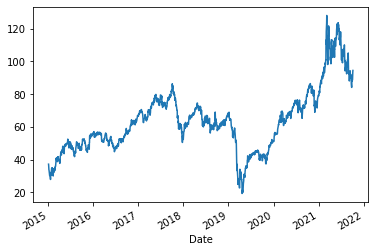

In [4]:
oil.Close.plot();

In [5]:
df = pd.DataFrame()
df['ds'] = oil.index.date
df['y'] = oil.Close.values 
df

,ds,y
0,2016-01-04,37.220001
1,2016-01-05,36.419998
2,2016-01-06,34.230000
3,2016-01-07,33.750000
4,2016-01-08,33.549999
...,...,...
1693,2022-09-30,87.959999
1694,2022-10-03,88.860001
1695,2022-10-04,91.800003
1696,2022-10-05,93.370003


In [6]:
m = Prophet()
m.fit(df)

20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
1793,2023-01-10
1794,2023-01-11
1795,2023-01-12
1796,2023-01-13
1797,2023-01-14


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1793,2023-01-10,121.705135,114.176716,130.165100
1794,2023-01-11,121.783248,114.234988,129.545056
1795,2023-01-12,122.042599,113.975685,129.915465
1796,2023-01-13,122.422175,114.991540,130.646555
1797,2023-01-14,124.863731,116.643085,133.178897


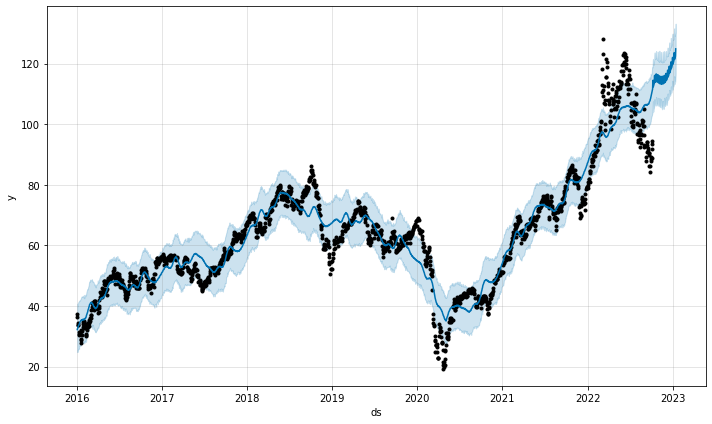

In [9]:
fig1 = m.plot(forecast)

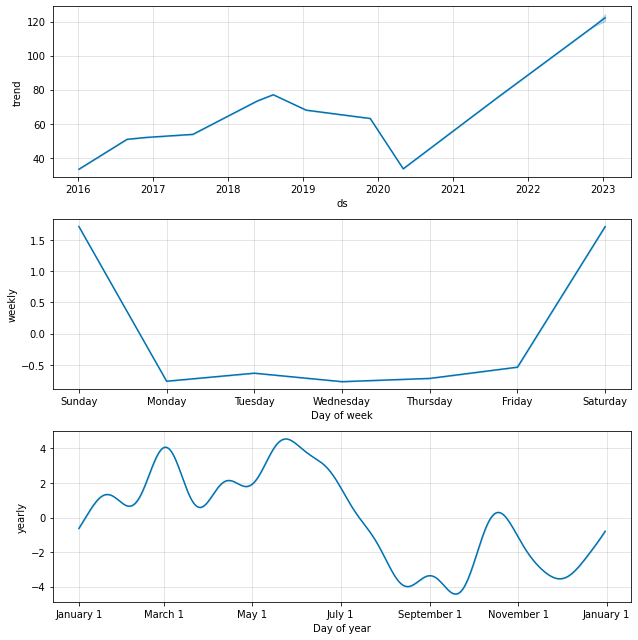

In [10]:
fig2 = m.plot_components(forecast)
